In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import yfinance as yf
from datetime import datetime,timedelta

# List of Yahoo Finance ticker symbols
tickers =tickers = [
  # "AUBANK",
  "AXISBANK",
  # "BANDHANBNK",
  "BANKBARODA",
  "FEDERALBNK",
  "HDFCBANK",
  "ICICIBANK",
  "IDFCFIRSTB",
  "INDUSINDBK",
  "KOTAKBANK",
  "PNB",
  "SBIN"

]

yahoo_tickers = [f'{ticker}.NS' for ticker in tickers]

all_data={}
dates_min={}
current_date=datetime.today()
for ticker in yahoo_tickers:
  # data=yf.download(ticker,period='max',interval='1d')
  data=yf.download(ticker,start="2016-01-01",end=current_date)
  all_data[ticker]=data['Adj Close']
  dates_min[ticker]=data.index.min()



df_concat=pd.concat(all_data,axis=1)
df_concat.columns=tickers


dates_min

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


{'AXISBANK.NS': Timestamp('2016-01-01 00:00:00'),
 'BANKBARODA.NS': Timestamp('2016-01-01 00:00:00'),
 'FEDERALBNK.NS': Timestamp('2016-01-01 00:00:00'),
 'HDFCBANK.NS': Timestamp('2016-01-01 00:00:00'),
 'ICICIBANK.NS': Timestamp('2016-01-01 00:00:00'),
 'IDFCFIRSTB.NS': Timestamp('2016-01-01 00:00:00'),
 'INDUSINDBK.NS': Timestamp('2016-01-01 00:00:00'),
 'KOTAKBANK.NS': Timestamp('2016-01-01 00:00:00'),
 'PNB.NS': Timestamp('2016-01-01 00:00:00'),
 'SBIN.NS': Timestamp('2016-01-01 00:00:00')}

In [25]:
print(df_concat.head())

              AXISBANK  BANKBARODA  FEDERALBNK    HDFCBANK   ICICIBANK  \
Date                                                                     
2016-01-01  438.935211  144.811508   52.746613  507.355042  223.255081   
2016-01-04  427.715454  137.664246   51.681484  498.850708  216.930954   
2016-01-05  425.813019  134.841766   51.635181  495.076080  217.907166   
2016-01-06  420.203186  135.388046   50.801609  497.266205  212.304550   
2016-01-07  399.275909  127.011665   48.625053  492.186829  209.460800   

            IDFCFIRSTB  INDUSINDBK   KOTAKBANK         PNB        SBIN  
Date                                                                    
2016-01-01   58.462521  911.453918  723.378723  112.277321  209.738937  
2016-01-04   56.777027  883.415710  701.545593  107.694580  203.201843  
2016-01-05   56.825184  884.408569  703.982605  105.594147  200.485764  
2016-01-06   55.621262  892.635803  699.854614  104.639412  199.657089  
2016-01-07   53.839458  875.188721  687.968

In [26]:







#calculate correlation matrix
correl_matrix=df_concat.corr()


# Extract the upper triangle of the correlation matrix
upper_tri = correl_matrix.where(np.triu(np.ones(correl_matrix.shape), k=1).astype(bool))

# Unstack the upper triangle matrix and reset the index to get a DataFrame of pairs
pairs = upper_tri.unstack().reset_index()

# Rename the columns for easier understanding
pairs.columns = ['Variable1', 'Variable2', 'Correlation']

# Sort the pairs by the correlation value in descending order and drop NaN values
top_pairs = pairs.sort_values(by='Correlation', ascending=False).dropna()

# Select the top 10 pairs
top_10_pairs = top_pairs.head(10)

print(top_10_pairs)



     Variable1   Variable2  Correlation
73   KOTAKBANK    HDFCBANK     0.966407
94        SBIN   ICICIBANK     0.956347
90        SBIN    AXISBANK     0.930559
40   ICICIBANK    AXISBANK     0.917758
43   ICICIBANK    HDFCBANK     0.900697
92        SBIN  FEDERALBNK     0.893770
20  FEDERALBNK    AXISBANK     0.862485
51  IDFCFIRSTB  BANKBARODA     0.835001
74   KOTAKBANK   ICICIBANK     0.831290
30    HDFCBANK    AXISBANK     0.821690


In [27]:
# Calculate the log prices
df_concat_log = np.log(df_concat)
print(df_concat.head())
hedge_ratio_list=[]

for i in range(len(top_10_pairs)):
     log_prices_A = df_concat_log[top_10_pairs.iloc[i,0]]
     log_prices_B = df_concat_log[top_10_pairs.iloc[i,1]]
     # Add a constant term for the intercept
     log_prices_B_with_const = sm.add_constant(log_prices_B)

     #Perform OLS regression
     model = sm.OLS(log_prices_A, log_prices_B_with_const)
     results = model.fit()

     # Extract the hedge ratio
     hedge_ratio = results.params[1]

     df_hedge_ratio=pd.DataFrame()
     hedge_ratio_list.append([top_10_pairs.iloc[i,0],top_10_pairs.iloc[i,1],hedge_ratio])
columns=['stock_a','stock_b','HEDGE_RATIO']
hedge_ratio_dataframe=pd.DataFrame(hedge_ratio_list,columns=columns)


              AXISBANK  BANKBARODA  FEDERALBNK    HDFCBANK   ICICIBANK  \
Date                                                                     
2016-01-01  438.935211  144.811508   52.746613  507.355042  223.255081   
2016-01-04  427.715454  137.664246   51.681484  498.850708  216.930954   
2016-01-05  425.813019  134.841766   51.635181  495.076080  217.907166   
2016-01-06  420.203186  135.388046   50.801609  497.266205  212.304550   
2016-01-07  399.275909  127.011665   48.625053  492.186829  209.460800   

            IDFCFIRSTB  INDUSINDBK   KOTAKBANK         PNB        SBIN  
Date                                                                    
2016-01-01   58.462521  911.453918  723.378723  112.277321  209.738937  
2016-01-04   56.777027  883.415710  701.545593  107.694580  203.201843  
2016-01-05   56.825184  884.408569  703.982605  105.594147  200.485764  
2016-01-06   55.621262  892.635803  699.854614  104.639412  199.657089  
2016-01-07   53.839458  875.188721  687.968

<ipython-input-27-46577a1a70c3>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = results.params[1]
<ipython-input-27-46577a1a70c3>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = results.params[1]
<ipython-input-27-46577a1a70c3>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hedge_ratio = results.params[1]
<ipython-input-27-46577a1a70c3>:17: FutureWarning: Series.__getitem__ treating keys as positio

In [28]:
hedge_ratio_dataframe

,stock_a,stock_b,HEDGE_RATIO
0,KOTAKBANK,HDFCBANK,0.920599
1,SBIN,ICICIBANK,0.728446
2,SBIN,AXISBANK,1.373749
3,ICICIBANK,AXISBANK,1.663719
4,ICICIBANK,HDFCBANK,1.444336
5,SBIN,FEDERALBNK,1.081904
6,FEDERALBNK,AXISBANK,1.006550
7,IDFCFIRSTB,BANKBARODA,0.558002
8,KOTAKBANK,ICICIBANK,0.542693
9,HDFCBANK,AXISBANK,0.975118


In [29]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

list_of_pvalue=[]

for i in range(len(hedge_ratio_dataframe)):
  log_prices_A = df_concat_log[hedge_ratio_dataframe.iloc[i,0]]
  log_prices_B = df_concat_log[hedge_ratio_dataframe.iloc[i,1]]
  # Hedge ratio
  n = hedge_ratio_dataframe.iloc[i,2]

  # Calculate the spread
  spread = log_prices_A - n * log_prices_B

  # Perform ADF test on the spread
  adf_result = adfuller(spread,autolag='AIC')

  # Extract results
  adf_statistic = adf_result[0]
  p_value = adf_result[1]
  critical_values = adf_result[4]


  list_of_pvalue.append([hedge_ratio_dataframe.iloc[i,0],hedge_ratio_dataframe.iloc[i,1],n,top_10_pairs.iloc[i,2],p_value,adf_statistic])

dataframe_of_p_values=pd.DataFrame(list_of_pvalue,columns=['stock_a','stock_b','hedge_ratio','correlation','p_value','test_statics'])
print(dataframe_of_p_values)

print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Interpret the result
if p_value < 0.1:
    print("The spread is stationary (reject the null hypothesis).")
else:
    print("The spread is not stationary (fail to reject the null hypothesis).")
# as test static is more than<= critical values of 1%,5%,10%
#it  mean that we can say spread is staionary with 1%,5%,10% significance levels

      stock_a     stock_b  hedge_ratio  correlation   p_value  test_statics
0   KOTAKBANK    HDFCBANK     0.920599     0.966407  0.000066     -4.756094
1        SBIN   ICICIBANK     0.728446     0.956347  0.343762     -1.875314
2        SBIN    AXISBANK     1.373749     0.930559  0.012096     -3.368086
3   ICICIBANK    AXISBANK     1.663719     0.917758  0.116651     -2.495184
4   ICICIBANK    HDFCBANK     1.444336     0.900697  0.205797     -2.201235
5        SBIN  FEDERALBNK     1.081904     0.893770  0.257608     -2.067919
6  FEDERALBNK    AXISBANK     1.006550     0.862485  0.250355     -2.085573
7  IDFCFIRSTB  BANKBARODA     0.558002     0.835001  0.030330     -3.051820
8   KOTAKBANK   ICICIBANK     0.542693     0.831290  0.316437     -1.933571
9    HDFCBANK    AXISBANK     0.975118     0.821690  0.268608     -2.041666
Critical Values:
   1%: -3.4334500311195946
   5%: -2.862909466719381
   10%: -2.567499038834725
The spread is not stationary (fail to reject the null hypothesis).


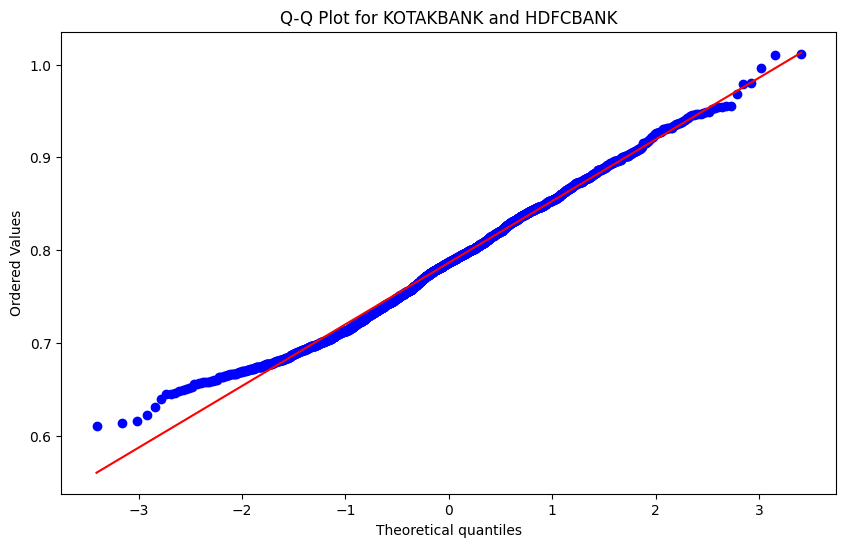

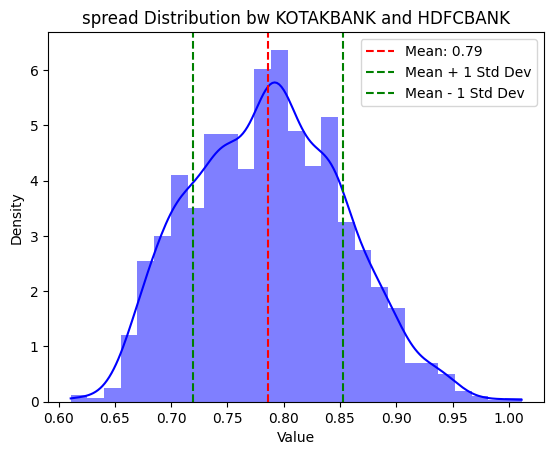

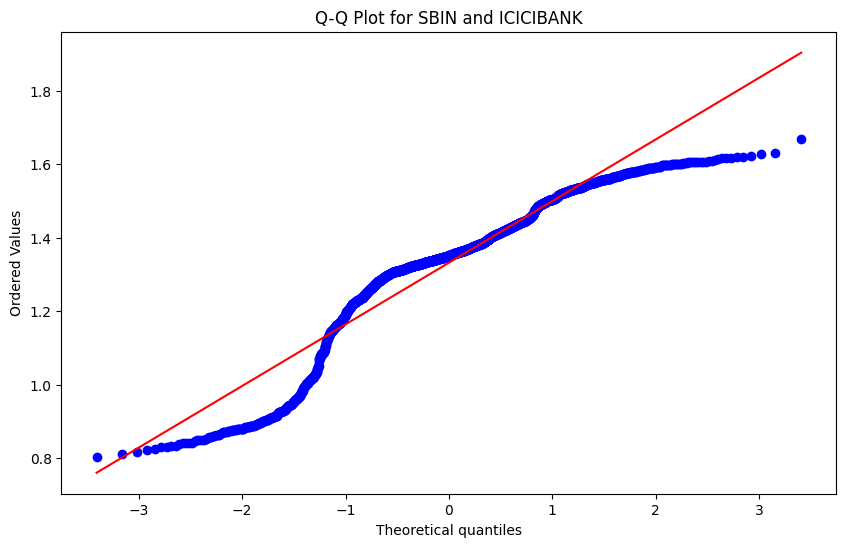

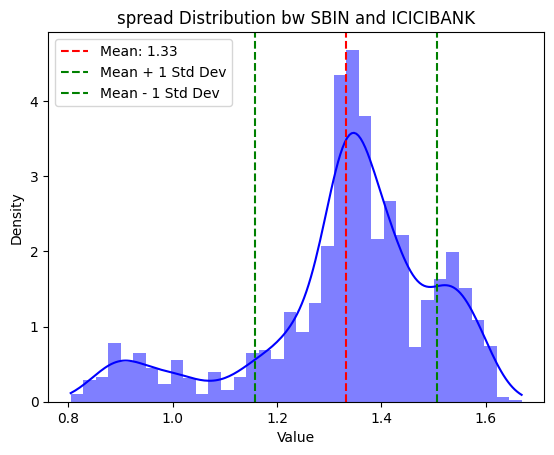

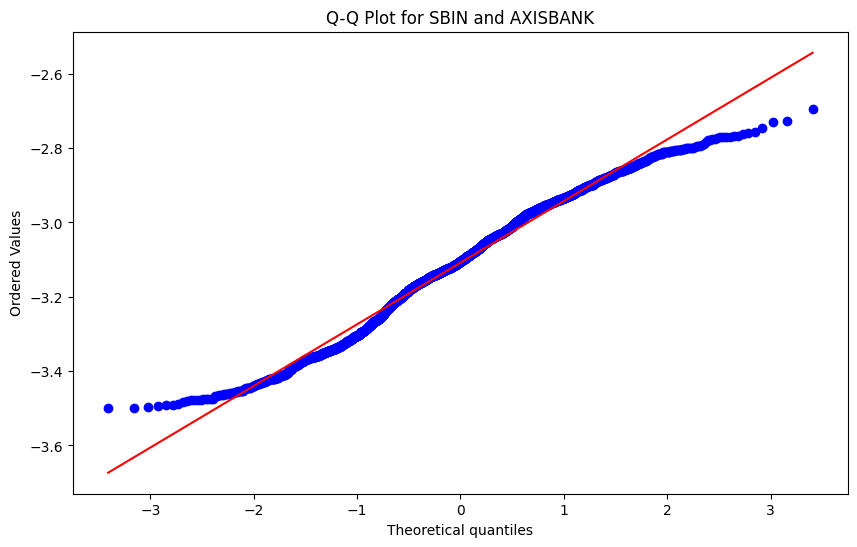

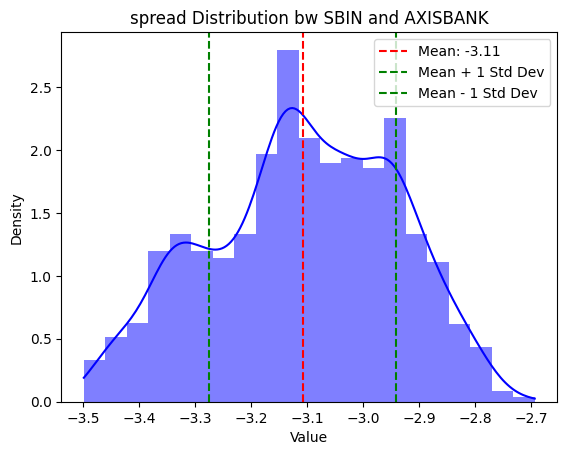

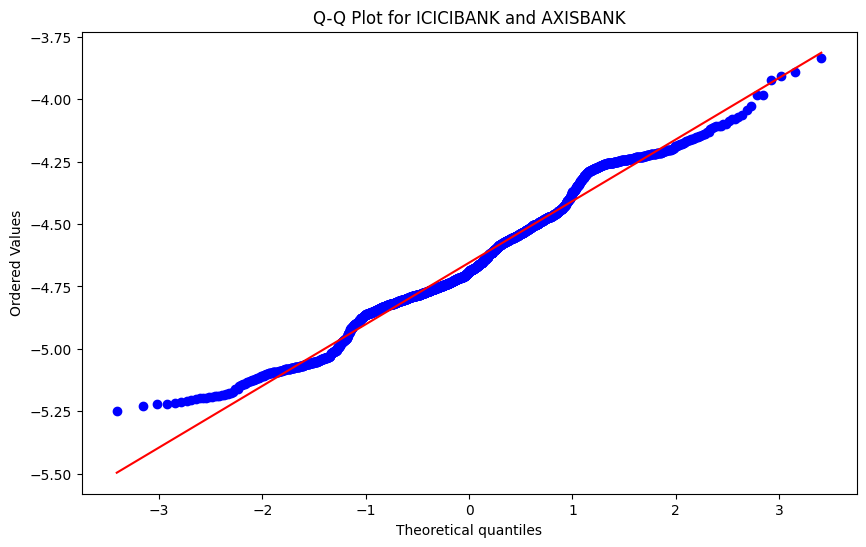

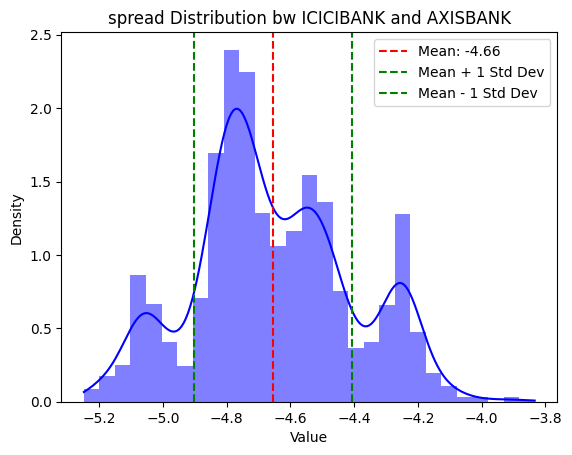

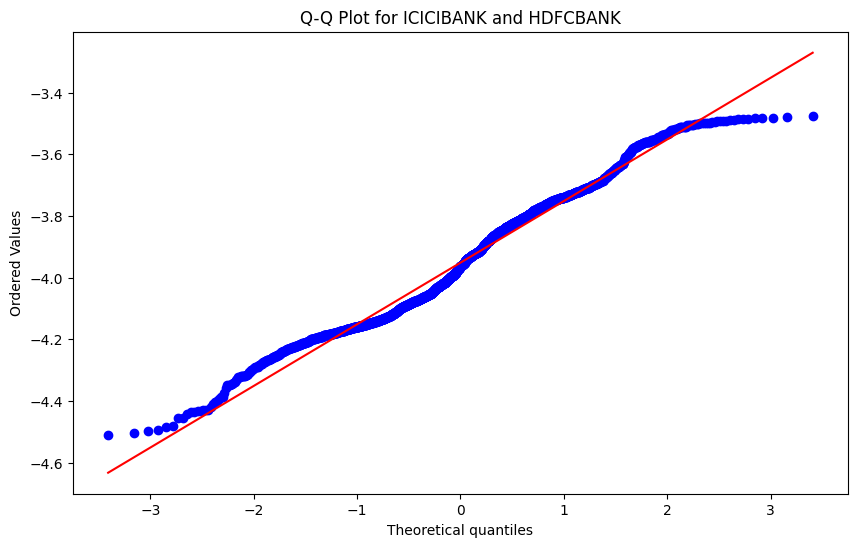

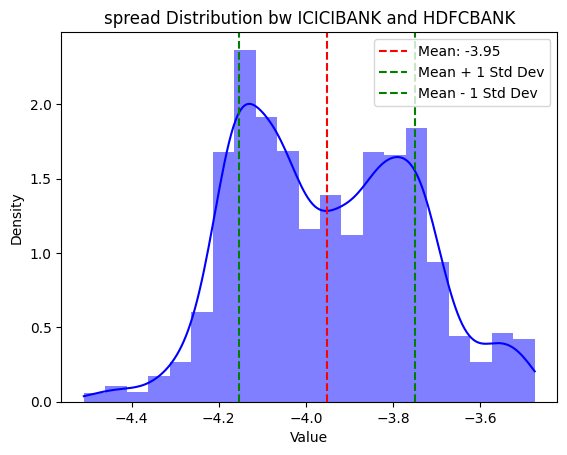

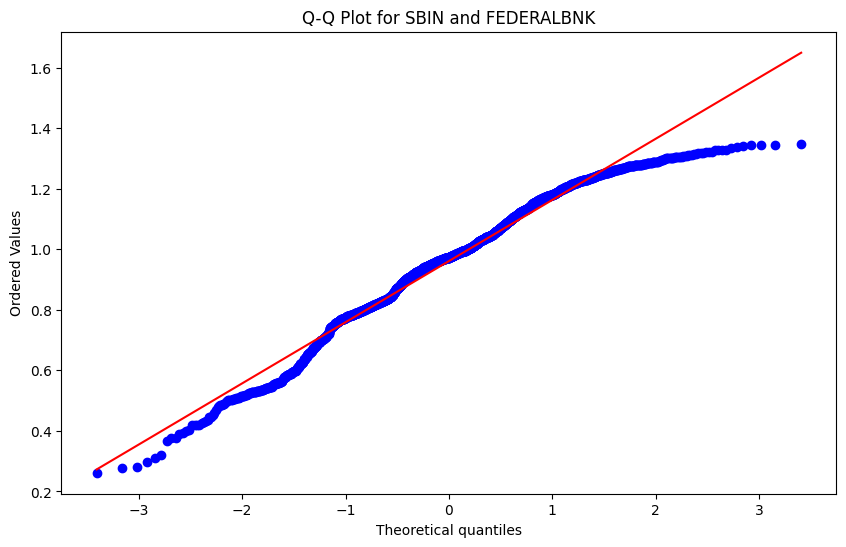

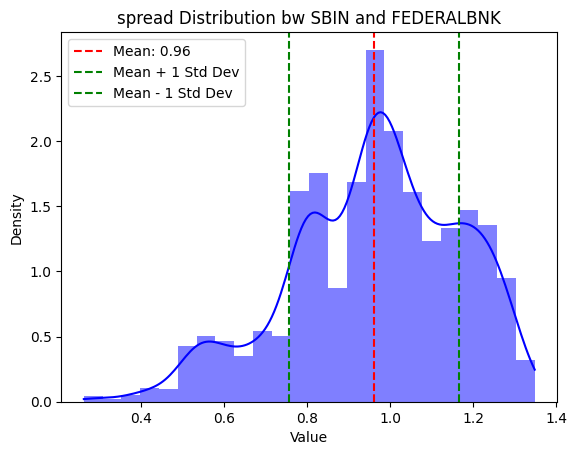

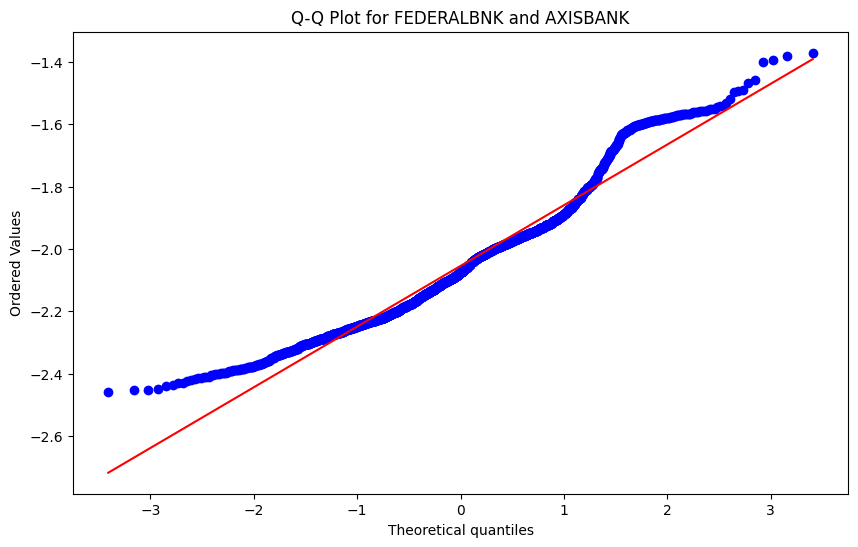

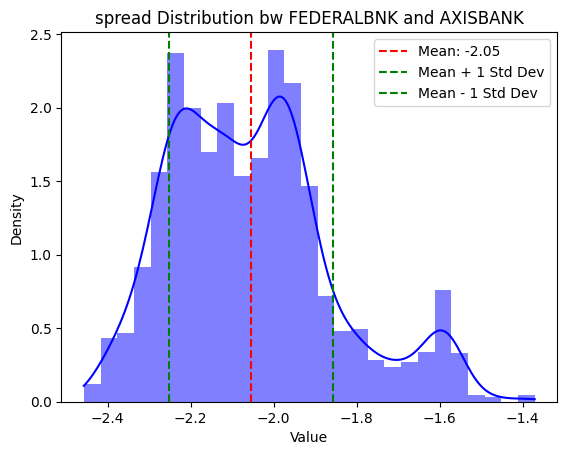

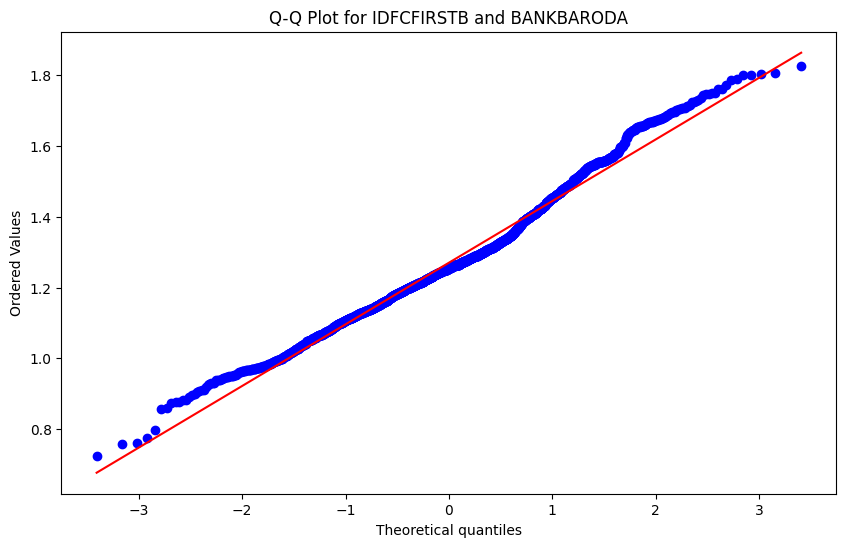

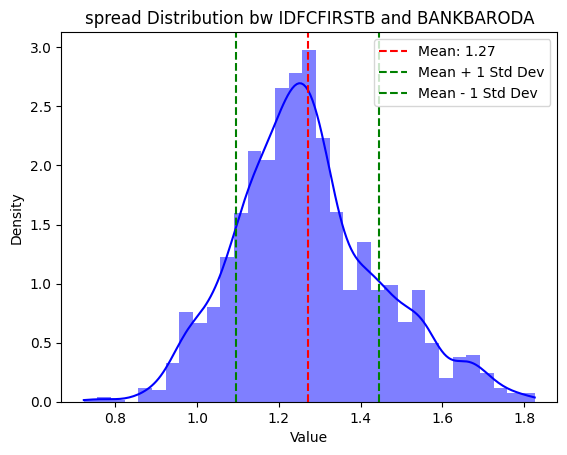

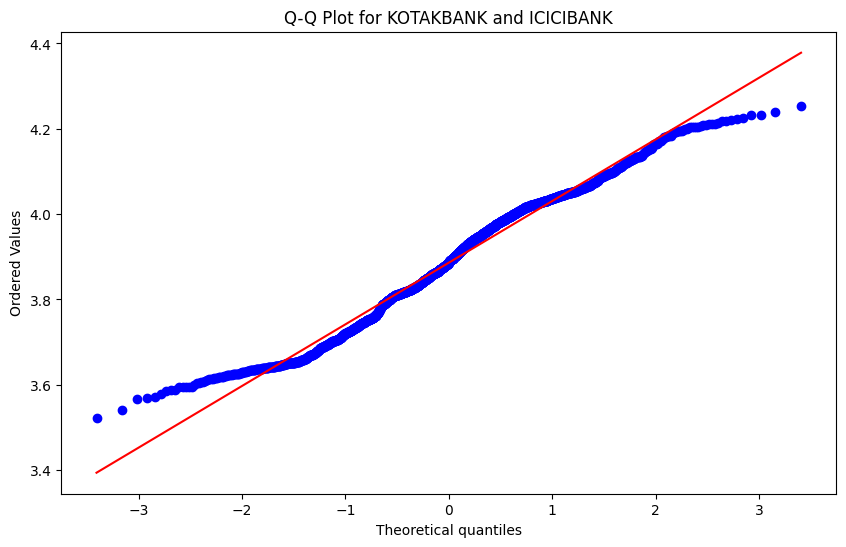

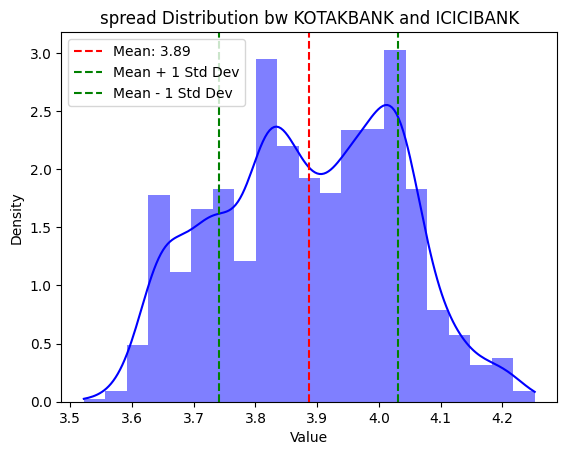

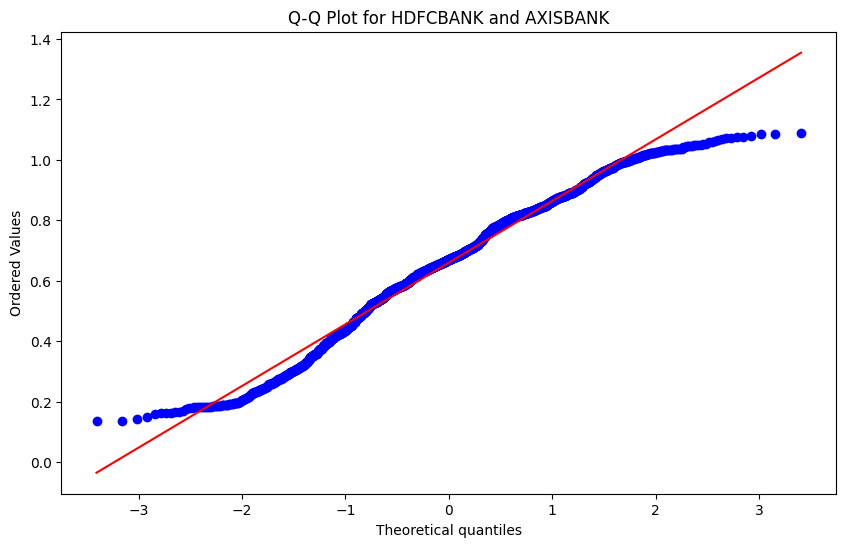

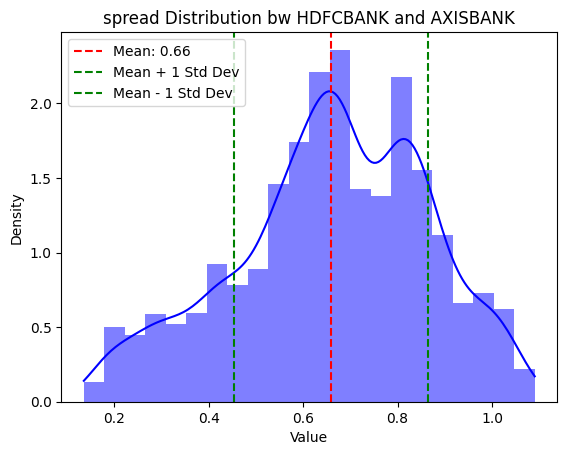

In [30]:


import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats




for i in range(len(hedge_ratio_dataframe)):


  log_prices_A = df_concat_log[hedge_ratio_dataframe.iloc[i,0]]
  log_prices_B = df_concat_log[hedge_ratio_dataframe.iloc[i,1]]
  # Hedge ratio
  n = hedge_ratio_dataframe.iloc[i,2]

  # Calculate the spread
  spread = log_prices_A - n * log_prices_B
  mean=np.mean(spread)
  std_dev=np.std(spread)


  # Example data
  data = spread

  # Create a histogram and a density plot
  plt.figure(figsize=(10, 6))

  # Q-Q plot
  stats.probplot(data, dist="norm", plot=plt)
  plt.title(f'Q-Q Plot for {hedge_ratio_dataframe.iloc[i,0]} and {hedge_ratio_dataframe.iloc[i,1]}')
  plt.show()
  # Plot histogram
  sns.histplot(data, kde=True, color='blue', stat='density', linewidth=0)

  # Plot the mean and standard deviation
  plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
  plt.axvline(mean + std_dev, color='green', linestyle='--', label=f'Mean + 1 Std Dev')
  plt.axvline(mean - std_dev, color='green', linestyle='--', label=f'Mean - 1 Std Dev')

  plt.title(f'spread Distribution bw {hedge_ratio_dataframe.iloc[i,0]} and {hedge_ratio_dataframe.iloc[i,1]}')
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.legend()

  plt.show()


In [ ]:
import math
current_spread=math.log(4382)-hedge_ratio*math.log(1642)
print(current_spread)

z_score_of_current_spread=(current_spread-mean)/std_dev
print(z_score_of_current_spread)

3.138320486110951
-0.1333452808337074
